# Homework1
A toy binary classification example with unbalanced samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
# confusion matrix
import itertools

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# 生成data
def generateData(n1, n2, var1 = 0.2, var2 = 0.1):
    theta = np.random.uniform(0, 2 * math.pi, n1+n2)
    r = np.append(np.random.normal(0, var1, n1).tolist(), np.random.normal(1, var2, n2).tolist())
    X = np.array([[a * math.cos(x) for a,x in zip(r, theta)], [a * math.sin(x) for a,x in zip(r, theta)]])
    y = np.repeat(np.array([0,1]),[n1, n2])
    return({ 'X' : X, 'y' : y})

In [3]:
def plt_contour(X, n1, n2, model = None, title = None,  n = 101):
    '''
    散佈圖 +
    輪廓圖 (X.shape = (2,n1+n2), n 為精緻度 越高越好)
    '''
    plt.scatter(X[0][n1:n1+n2],X[1][n1:n1+n2])
    plt.scatter(X[0][0:n1],X[1][0:n1])
    if(model != None):
        x1 = np.repeat(np.linspace(-1.5,1.5,n),n)
        x2 = np.array([np.linspace(-1.5,1.5,n) for i in range(n)]).reshape(-1)
        grid = np.array([x1, x2]).T
        prob_grid = model.predict(grid)

        plt.contour(x1.reshape(n,-1), x2.reshape(n,-1), prob_grid.T[1].reshape(n,-1),
                    levels = [0.5])
    plt.legend(['Group 1', 'Group 2'])
    if(title != None):
        plt.title(title)
    plt.show()

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    confusion matrix.
    `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / sum(cm)
#         cm = cm.astype('float') / sum(cm)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def show_confusion_matrix(model, dat):
    '''
    plot confusion matrix *2 & print ACC
    '''
    ans = model.predict(dat['X'].T)
    y_pred_value = np.array([])

    for ele in ans:
        y_pred_value = np.append(y_pred_value, np.argmax(ele))
        #print(ele, np.argmax(ele))
    cnf_matrix = confusion_matrix(y_pred_value, dat['y'])
#     cnf_matrix
    plot_confusion_matrix(cnf_matrix, classes=range(1, 3),
                      title='Confusion matrix, without normalization')
    plt.show()
    plot_confusion_matrix(cnf_matrix, classes=range(1, 3), normalize=True,
                          title='Confusion matrix')
    plt.show()
    acc = np.round(sum(np.diag(cnf_matrix)) / sum(cnf_matrix.reshape(-1)), 3)
    print("ACC = " + str((acc)))

In [6]:
def plot_history(history, train_metrics, val_metrics, tittle = None):
    plt.plot(history.history.get(train_metrics),'-')
    plt.plot(history.history.get(val_metrics),'-')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title(tittle)

# Training Data
n1 = 20 ， n2 = 200

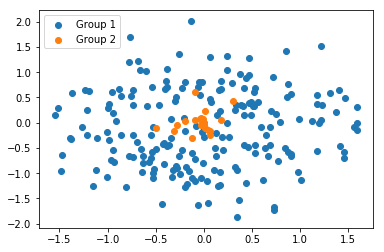

In [7]:
# training data
n1 = 20
n2 = 200
dat = generateData(n1, n2, 0.3, 0.4)
X = dat['X']
# print(X)
y = dat['y']
y = np_utils.to_categorical(y)
plt_contour(X, n1, n2)

# Model1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


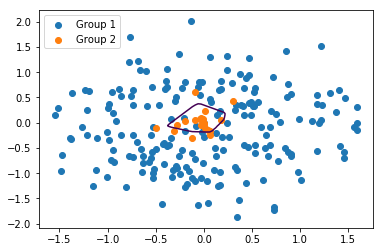

In [8]:
model = Sequential()
model.add(Dense(units = 10, activation = 'relu', input_dim = 2))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "nadam", metrics=['accuracy'])
model.summary()
history = model.fit(X.T, y, epochs=500, verbose=0, validation_split=0.2)
plt_contour(X, n1, n2, model)

Confusion matrix, without normalization


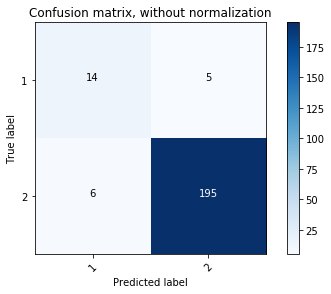

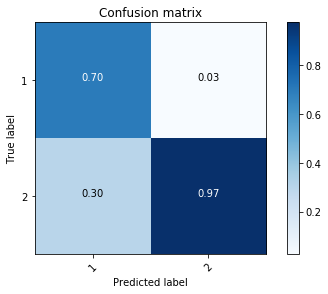

ACC = 0.95


In [9]:
show_confusion_matrix(model, dat)

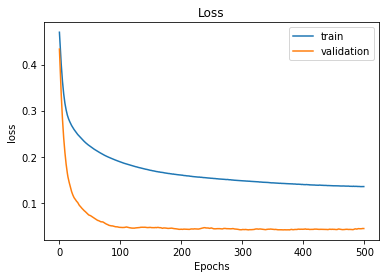

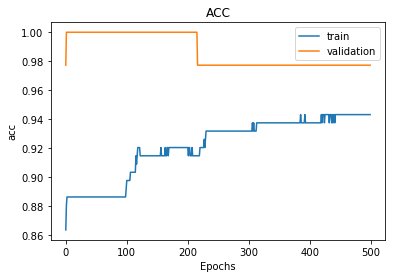

In [10]:
plot_history(history, 'loss','val_loss', 'Loss')
plt.show()
plot_history(history, 'acc','val_acc', 'ACC')
plt.show()
# print("acc", np.round(history.history.get('val_acc'), 3))

# Model2(加weight)
weight = 10:1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


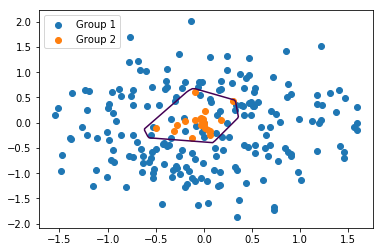

In [11]:
model2 = Sequential()
model2.add(Dense(units = 10, activation = 'relu', input_dim = 2))
model2.add(Dense(units = 2, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = "nadam", metrics=['accuracy'])
model2.summary()
class_weight = {0 : 10, 1: 1}
history2 = model2.fit(X.T, y, epochs=500, verbose=0, class_weight = class_weight, validation_split=0.2)
plt_contour(X, n1, n2, model2)

Confusion matrix, without normalization


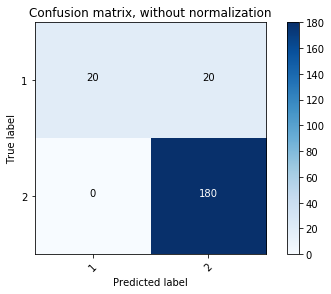

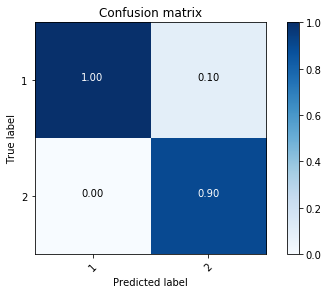

ACC = 0.909


In [12]:
show_confusion_matrix(model2, dat)

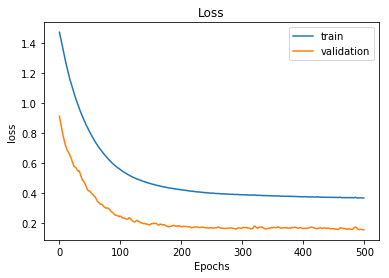

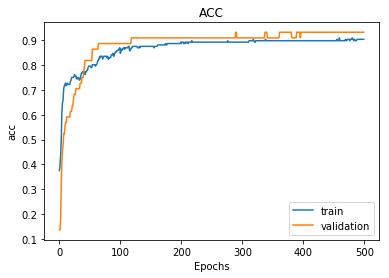

In [13]:
plot_history(history2, 'loss','val_loss', 'Loss')
plt.show()
plot_history(history2, 'acc','val_acc', 'ACC')
plt.show()
# print("acc", np.round(history2.history.get('val_acc'), 3))

# Model3
將group1的樣本重複至與group2相似

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


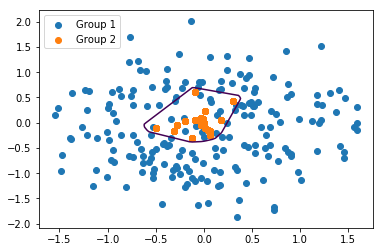

In [14]:
rep_x = X.T[0:n1].T
rep_X = np.array([np.append(np.repeat(x,9),y) for x,y in zip(rep_x,X)])
rep_y = np.append(np.repeat(y[0:n1],9,axis=0),y,axis=0)

model3 = Sequential()
model3.add(Dense(units = 10, activation = 'relu', input_dim = 2))
model3.add(Dense(units = 2, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = "nadam", metrics=['accuracy'])
model3.summary()
history = model3.fit(rep_X.T, rep_y, epochs=500, verbose=0, validation_split=0.2)
plt_contour(rep_X, 10 * n1, n2, model3)

Confusion matrix, without normalization


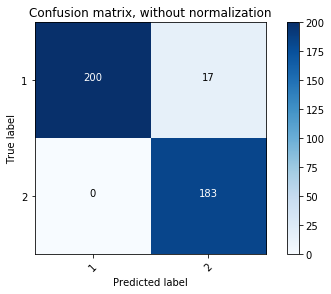

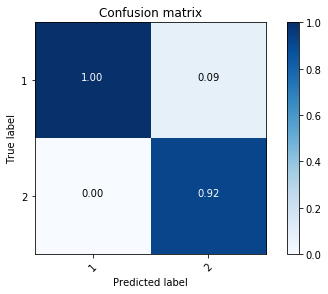

ACC = 0.958


In [15]:
dat_cut = {'X' : rep_X, 'y' : rep_y.T[1]}
show_confusion_matrix(model3, dat_cut)

與loss加weight概念相似

# Model4
將group2的樣本減少至與group1相似

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


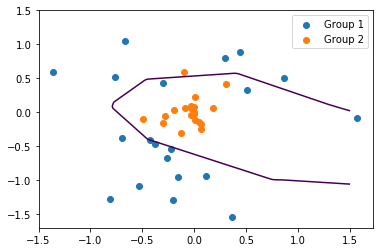

In [16]:
x_cut = X.T[0:n1+n1].T
y_cut = y[0:n1+n1]

model4 = Sequential()
model4.add(Dense(units = 10, activation = 'relu', input_dim = 2))
model4.add(Dense(units = 2, activation = 'softmax'))
model4.compile(loss = 'categorical_crossentropy', optimizer = "nadam", metrics=['accuracy'])
model4.summary()
history = model4.fit(x_cut.T, y_cut, epochs=500, verbose=0, validation_split=0.2)
plt_contour(x_cut, n1, n1, model4)

Confusion matrix, without normalization


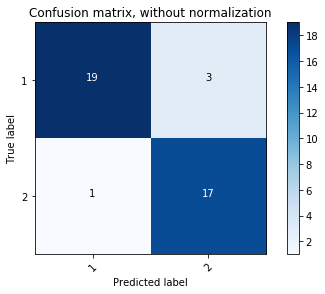

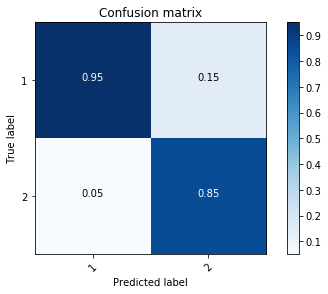

ACC = 0.9


In [17]:
dat_cut = {'X' : x_cut, 'y' : y_cut.T[1]}
show_confusion_matrix(model4, dat_cut)

# Testing

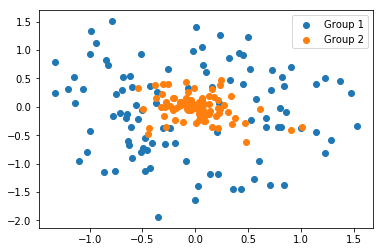

In [18]:
# testing data
n1_t = 100
n2_t = 100
dat_t = generateData(n1_t, n2_t, 0.3, 0.4)
X_t = dat_t['X']
# print(X)
y_t = dat_t['y']
plt_contour(X_t, n1_t, n2_t)

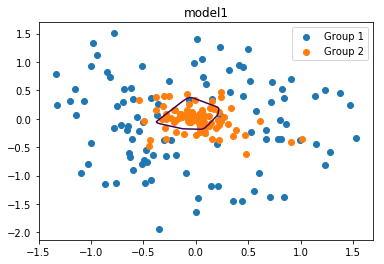

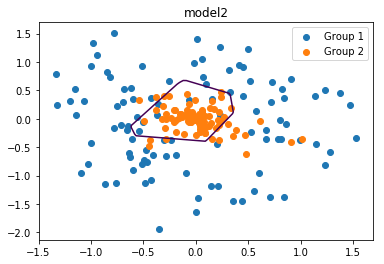

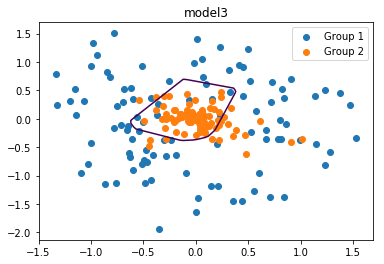

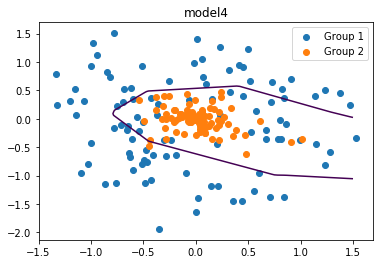

In [19]:
plt_contour(X_t, n1_t, n2_t, model, 'model1')
plt_contour(X_t, n1_t, n2_t, model2, 'model2')
plt_contour(X_t, n1_t, n2_t, model3, 'model3')
plt_contour(X_t, n1_t, n2_t, model4, 'model4')

----------------model1----------------
Confusion matrix, without normalization


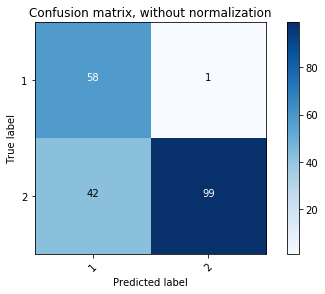

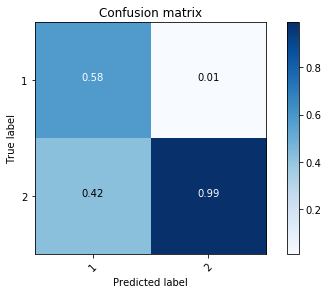

ACC = 0.785
----------------model2----------------
Confusion matrix, without normalization


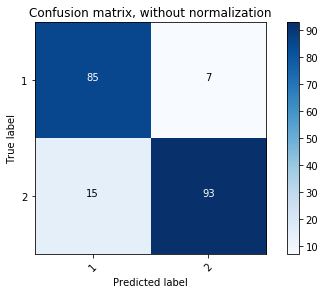

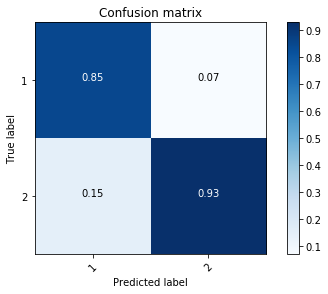

ACC = 0.89
----------------model3----------------
Confusion matrix, without normalization


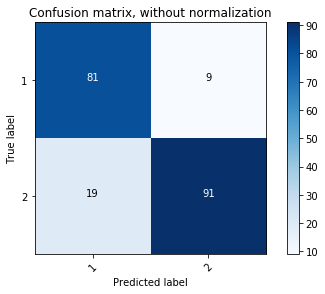

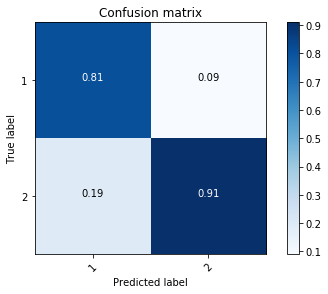

ACC = 0.86
----------------model4----------------
Confusion matrix, without normalization


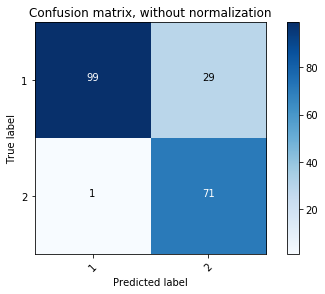

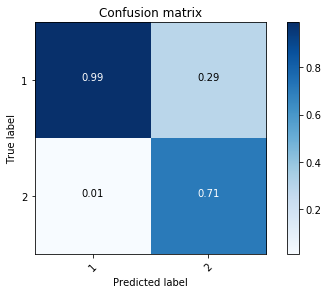

ACC = 0.85


In [20]:
print("----------------model1----------------")
show_confusion_matrix(model, dat_t)
print("----------------model2----------------")
show_confusion_matrix(model2, dat_t)
print("----------------model3----------------")
show_confusion_matrix(model3, dat_t)
print("----------------model4----------------")
show_confusion_matrix(model4, dat_t)

In [24]:
import pandas as pd
T1 = [0.58, 0.85, 0.81, 0.99]
T2 = [0.99, 0.93, 0.91, 0.71]
acc = [0.785, 0.89, 0.86, 0.85]
name = ["model1", "model2", "model3", "model4"]
pd.DataFrame(np.array([name, T1, T2, acc]).T,
             columns = ["Model", "Group1", "Group2", "ACC"])

,Model,Group1,Group2,ACC
0,model1,0.58,0.99,0.785
1,model2,0.85,0.93,0.89
2,model3,0.81,0.91,0.86
3,model4,0.99,0.71,0.85


Model2 與 Model3為較佳的選擇